<a href="https://colab.research.google.com/github/jacob-torres/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/Jacob_Torres_LS_DS_122_Chi2_Tests_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Practice Chi-square Tests

###Dataset description:

Slasher movies thrill audiences by portraying a lone antagonist (typically male) who attacks innocent victims with extreme violence and without apparent motive. However, this exciting (if gory) subgenre of horror film is criticized by those who view the violence as being used to “punish” female characters who engage in sexual activity during the film. To test this claim, study authors randomly sampled 50 North American slasher films released from 1960 to 2009 and coded the 485 characters appearing in them as being male or female, involved in sexual activity or not, and if they survived the film or not1. The data appears in the Slasher.csv dataset. In this project, we are going to answer a slightly simpler question: Are female characters in slasher films more likely to be "murdered" than male characters?

Source: A. Welsh (2010). "On the Perils of Living Dangerously in the Slasher Horror Film: Gender Differences in the Association Between Sexual Activity and Survival," Sex Roles, Vol. 62 pp. 762-773

You can find the Slasher.csv file here:

<https://raw.githubusercontent.com/Chelsea-Myers/Lambda-Intro/master/Slasher.csv>





### 1) Load the Slasher.csv dataset in a new dataframe.



In [ ]:
# Import notebook libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [ ]:
slasher_url = 'https://raw.githubusercontent.com/Chelsea-Myers/Lambda-Intro/master/Slasher.csv'
slasher = pd.read_csv(slasher_url, index_col=0)
print(slasher.shape)

(485, 3)


###2) Display the top 5 rows of the dataframe to take a look at the variable names and values.

In [ ]:
slasher.head()

,Gender,Activity,Survival
ID,,,
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1
5,1,1,1


The variable codes are:

ID = Character ID

Gender = Character gender.  0 = female, 1 = male

Activity = Character was portrayed as engaged in sexual activity.  0 = no, 1 = yes

Survival = Character survival in the film. 0 = did not survive, 1 = survived

###3) Calculate the frequency and relative frequency of male and female characters in this set of slasher films.  Describe your results in a sentence or two.

In [ ]:
# Frequency of genders
slasher['Gender'].value_counts(dropna=False)

0    263
1    222
Name: Gender, dtype: int64

In [ ]:
# Relative frequency of genders
gender_dist = pd.crosstab(index=slasher['Gender'], columns='Frequency')
(gender_dist / gender_dist.sum()) * 100

col_0,Frequency
Gender,
0,54.226804
1,45.773196


The results show that there are slightly more female than male characters in this dataset.

###4) Calculate the frequency and relative frequency of character survival in this set of slasher films.  Describe your results in a sentence or two.

In [ ]:
# Frequency of character survival
survival_dist = pd.crosstab(index=slasher['Survival'], columns='Frequency')
survival_dist

col_0,Frequency
Survival,
0,400
1,85


In [ ]:
# Relative frequency of character survival
(survival_dist / survival_dist.sum()) * 100

col_0,Frequency
Survival,
0,82.474227
1,17.525773


The results show that an overwhelming percentage of the characters in the dataset did not survive (roughly 82%.)

###5) Calculate the joint distribution of character sex and movie survival. Add the table margins.  

Hint: If you are working off of the in-class examples, it will be helpful to include character sex as the index variable. 

Describe your results in a sentence or two.

In [ ]:
# Show the joint frequencies of character gender and survival
joint_dist = pd.crosstab(index=slasher['Gender'], columns=slasher['Survival'], margins=True)
joint_dist

Survival,0,1,All
Gender,,,
0,228,35,263
1,172,50,222
All,400,85,485


In [ ]:
# Normalize the variable frequencies
(pd.crosstab(index=slasher['Gender'], columns=slasher['Survival'], normalize='index')) * 100

Survival,0,1
Gender,,
0,86.692015,13.307985
1,77.477477,22.522523


The results suggest that around 9% less female characters survived than male characters.

###6) Calculate the distribution of survival conditional on character sex.
Hint: If you are working off of the in-class examples, it will be helpful to include character sex as the index variable. 

Describe your results in a sentence or two.

Describe your results here.

###7) Identify the appropriate null and alternative hypotheses to test for a statistically significant relationship between character sex and survival. 

**Ho:** There is no relationship between character gender and survival.

**Ha:** There is a relationship between character gender and survival.

### 8) Perform the chi-square test above using `stats.chi2_contingency()` and output the p-value.


In [ ]:
# Run chi-squared test on the joint distribution table
g, p, dof, expected = chi2_contingency(joint_dist)
print(p)

0.13215171811370865


### 9) Interpret your p-value in 8) at the 0.05 significance level, and summarize your results in a sentence or two.

The pvalue = 0.13, which is greather than the significance level of 0.05. This means that I will not reject the null (there is not a relationship between character gender and survival in slasher movies.)

### 10) Create a side-by-side bar plot to illuatrate the relationship between character sex and survival in Slasher movies.  Sum up your overall results in a sentence or two.

<BarContainer object of 2 artists>

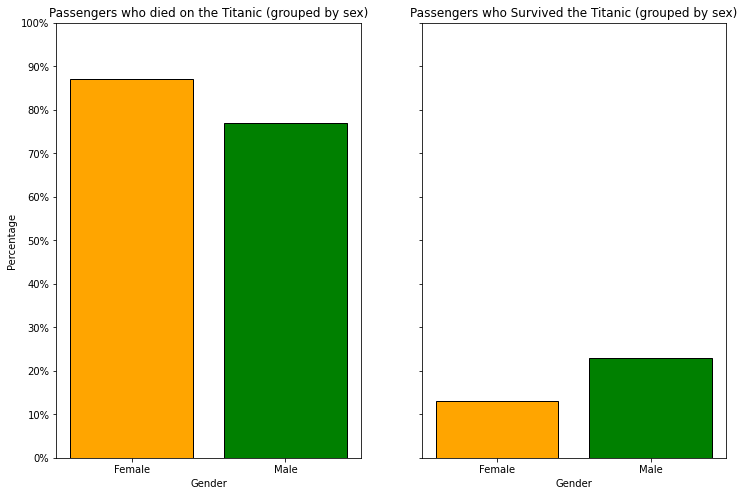

In [ ]:
# Axis variables
x = np.arange(2)
y = np.arange(110, step=10)
x_labels = ['Female', 'Male']
y_labels = ['0%', '10%', '20%', '30%', '40%', '50%',
  '60%', '70%', '80%', '90%', '100%']
died_bars = (87, 77)
survived_bars = (13, 23)
bar_colors = ['orange', 'green']

# Create the plots
fig, axs = plt.subplots(
    figsize=(12, 8), ncols=2, sharey=True)
axs[0].set_title("Passengers who died on the Titanic (grouped by sex)")
axs[1].set_title("Passengers who Survived the Titanic (grouped by sex)")

# y-axis
axs[0].set_ylabel("Percentage")
axs[0].set_ylim(0, 100)
axs[0].set_yticks(y)
axs[0].set_yticklabels(y_labels)

# x-axes
axs[0].set_xlabel("Gender")
axs[1].set_xlabel("Gender")
axs[0].set_xticks(x)
axs[0].set_xticklabels(x_labels)
axs[1].set_xticks(x)
axs[1].set_xticklabels(x_labels)

# Set bar heights and colors
axs[0].bar(x, died_bars, color=bar_colors, edgecolor='black')
axs[1].bar(x, survived_bars, color=bar_colors, edgecolor='black')

The female and male survival rates appear to mirror each other. The bar charts suggest that the female survival rate is slightly lower than that of the males. Likewise, the female death rate appears to be slightly higher. However, the trend of very high deaths and very low survival is strong in both charts. The difference between the two genders in terms of survival could even be attributed to the fact that there are slightly more female characters in the dataset than male characters, though this isn't necessarily true either.

In short: the results are inconclusive around the relationship between character gender and survival.

## Stretch Goals:

###1. Explore the concept of an odds ratio

Another way to quantify the relationship between two categorical variables is by calculating the odds ration, which is the ratio of the odds of an event happening in one group to the odds of the event happening in another group.

[Lots more about the odds ratio](https://en.wikipedia.org/wiki/Odds_ratio).

We can use Python to calculate the odds of surviving a slaser movie for female compared to male characters.

You can find more information about calculating the odds ratio for a 2x2 table in Python [here](https://www.statsmodels.org/stable/contingency_tables.html).  Scroll down to the section labeled "A Single 2x2 Table".

Calculate the odds ratio comparing the odds of movie survival in female compared to male characters.  Interpret what this number tells you about the likelihood of male and female characters surviving the film.


In [ ]:
# YOUR WORK HERE

Sum up your results in a sentence or two.


### 2. Learn about Simpson's Paradox

[Simpson's Paradox](https://en.wikipedia.org/wiki/Simpson%27s_paradox#:~:text=Simpson's%20paradox%2C%20which%20goes%20by,when%20these%20groups%20are%20combined.) occurs when a trend that appears in separate groups disappears or reverses when those groups are combined.  

Create a scenario where Hopsital A has a lower overall mortality rate than Hospital B but has a higher mortality rate if cases are separated into two groups: high risk and low risk.


In [ ]:
# YOUR WORK HERE

Sum up your results in a sentence or two.